# Support Vector Machine

## import dataset

In [1]:
import pandas as pd
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
# cell_df['Class'].value_counts()
df['Class'].unique()

array([2, 4])

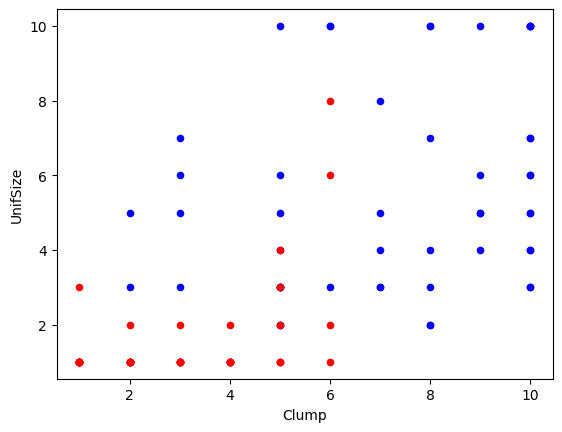

In [3]:
import matplotlib.pyplot as plt
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='b');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='r', ax=ax)
plt.show()

## cleaning

In [4]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [6]:
df[df['BareNuc'] == '?'][:2]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2


In [7]:
import numpy as np
# df['BareNuc'] = df['BareNuc'].apply(pd.to_numeric, errors='coerce')
# df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'].replace({'?': np.nan}, inplace=True)

C:\Users\javad\AppData\Local\Temp\ipykernel_9280\44521018.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BareNuc'].replace({'?': np.nan}, inplace=True)


In [8]:
df[df['BareNuc'] == '?']

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class


In [9]:
df.dropna(subset=['BareNuc'], inplace=True)

In [10]:
df[22:25]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
22,1056784,3,1,1,1,2,1,2,1,1,2
24,1059552,1,1,1,1,2,1,3,1,1,2
25,1065726,5,2,3,4,2,7,3,6,1,4


In [11]:
# df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
# -------------------------------------------------------------------------------
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## encoding

In [12]:
# encode the data

## define x , y

In [13]:
import numpy as np
x = df.loc[: , 'Clump':'Mit'].values
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [14]:
df['Class'] = df['Class'].astype('int')
y = df['Class'].values
y[0:5]

array([2, 2, 2, 2, 2])

## spliting

In [15]:
### finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i) 
#     sc = StandardScaler().fit(x_train)
#     x_train = sc.transform(x_train)
#     x_test = sc.transform(x_test)
#     svc = SVC(kernel='rbf', random_state=1)
#     svc.fit(x_train, y_train)
#     yhat_test = svc.predict(x_test)
#     acc = accuracy_score(y_test, yhat_test)
#     lst.append(acc)
# t2 = time.time()
# print(f"run time: {round((t2 - t1) / 60 , 0)} min")
# print(f"accuracy_score = {round(max(lst),2)}")
# print(f"random_state = {np.argmax(lst) + 1}")

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

## scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## fit train data

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=1) # default kernel='rbf'
svc.fit(x_train, y_train)

SVC(random_state=1)

## predict test data

In [19]:
yhat_test = svc.predict(x_test)
print(yhat_test [0:5])

[4 4 2 4 2]


## evaluating

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy_score (train data): ", accuracy_score(y_train, svc.predict(x_train)))
print("Accuracy_score (test data): ", accuracy_score(y_test, yhat_test))

Accuracy_score (train data):  0.984375
Accuracy_score (test data):  0.935672514619883


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yhat_test))

[[98  6]
 [ 5 62]]


In [22]:
from sklearn.metrics import f1_score
print(f1_score(y_test, yhat_test, average='weighted') )

0.9357553841662664


In [23]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat_test,pos_label=2))

0.8990825688073395


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           2       0.95      0.94      0.95       104
           4       0.91      0.93      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## save the model

In [25]:
# import joblib
# joblib.dump(svc, 'svc_model.pkl')

## load the model

In [26]:
# import joblib
# svc = joblib.load('svc_model.pkl')